In [9]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Importing the dataset
df = pd.read_csv("city_day.csv")

In [11]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [13]:
#We drop the Xylene column as it has too many NULL values
#We extract out the year and month data
def preprocessing(df):
    df['Date'] = pd.to_datetime(df['Date'])
    
    df['Year'] = [d.year for d in df['Date']]
    df['Month'] = [d.month for d in df['Date']]
    
    df.dropna(subset = ['AQI'],inplace = True)
    df = df.drop(['Xylene'],axis = 1)
    
    return df
    

In [14]:
df = preprocessing(df)
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,209.0,Poor,2015,1
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor,2015,1
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,514.0,Severe,2015,1
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,782.0,Severe,2015,2
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,914.0,Severe,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,Good,2020,6
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,Satisfactory,2020,6
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,Satisfactory,2020,6
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,Satisfactory,2020,6


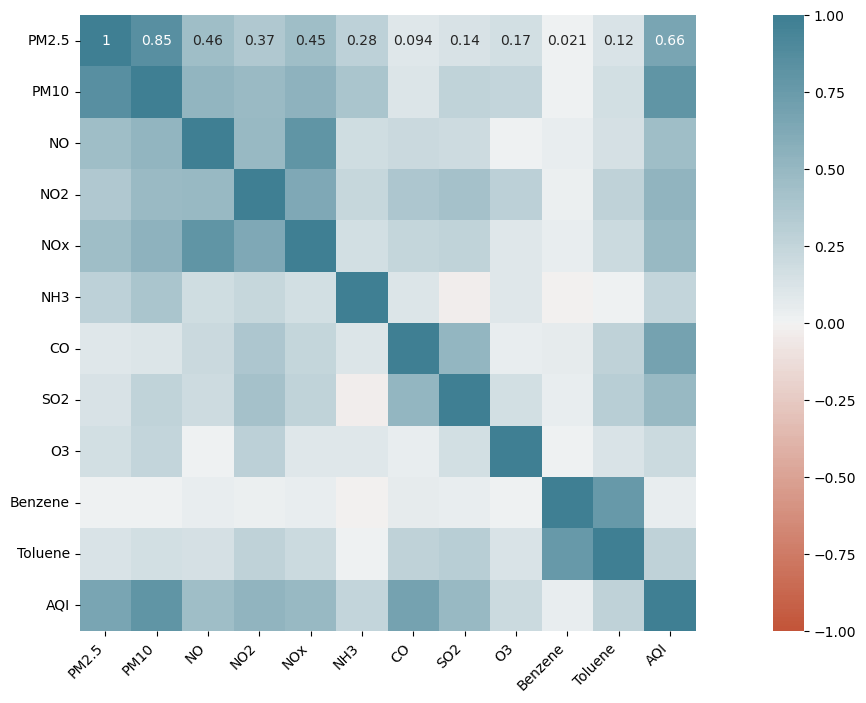

In [18]:

# df_corr = df.corr()
# df_corr = df_corr.drop(['Year','Month'],axis = 1)
# df_corr = df_corr.drop(['Year','Month'],axis = 0)
# plt.figure(figsize=(20,8))
# ax = sns.heatmap( df_corr, 
#     vmin=-1, vmax=1, center=0,
#     cmap=sns.diverging_palette(20, 220, n=200),
#     square=True, annot = True
# )
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# )


# Ensure df contains only numeric data for correlation calculation
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
df_corr = numeric_df.corr()

# Drop 'Year' and 'Month' if they are present in the correlation matrix
if 'Year' in df_corr.columns:
    df_corr = df_corr.drop(['Year'], axis=1)
    df_corr = df_corr.drop(['Year'], axis=0)
if 'Month' in df_corr.columns:
    df_corr = df_corr.drop(['Month'], axis=1)
    df_corr = df_corr.drop(['Month'], axis=0)

# Plot the heatmap
plt.figure(figsize=(20, 8))
ax = sns.heatmap(
    df_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

In [19]:
#List of cities for which we have the data
cities = df['City'].unique()
cities

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [20]:
#Extracting out the data for Jaiur, delhi and guwahati
jaipur = df[df['City'] == 'Jaipur']
delhi = df[df['City'] == 'Delhi']
guwahati = df[df['City'] == 'Guwahati']

In [21]:
jaipur

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
16593,Jaipur,2017-06-20,70.10,75.55,10.55,6.16,NaN,8.17,0.81,9.02,13.83,0.00,0.26,149.0,Moderate,2017,6
16594,Jaipur,2017-06-21,67.50,93.80,10.29,2.98,NaN,5.10,0.71,9.26,38.19,0.00,0.33,126.0,Moderate,2017,6
16595,Jaipur,2017-06-22,24.80,31.95,10.17,3.11,NaN,5.04,0.74,8.89,44.67,0.00,0.33,85.0,Satisfactory,2017,6
16596,Jaipur,2017-06-23,32.30,47.40,9.64,3.27,NaN,3.80,0.68,8.39,39.16,0.00,0.17,62.0,Satisfactory,2017,6
16597,Jaipur,2017-06-24,55.36,73.69,32.81,1.68,NaN,13.26,0.77,9.33,10.76,0.00,0.00,77.0,Satisfactory,2017,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17696,Jaipur,2020-06-27,28.33,76.66,6.15,14.72,18.14,21.82,0.59,9.96,39.12,0.23,0.59,89.0,Satisfactory,2020,6
17697,Jaipur,2020-06-28,23.76,67.44,5.60,14.05,17.20,20.41,0.50,8.93,34.40,0.16,0.39,75.0,Satisfactory,2020,6
17698,Jaipur,2020-06-29,30.58,77.30,6.21,16.63,19.50,22.70,0.55,10.59,39.21,0.22,0.47,69.0,Satisfactory,2020,6
17699,Jaipur,2020-06-30,30.03,64.26,5.48,13.77,16.94,19.79,0.67,10.36,50.71,0.48,1.48,79.0,Satisfactory,2020,6


In [22]:
jaipur.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month
count,1094,1092.000000,1090.000000,1088.000000,1090.000000,1001.000000,1089.000000,1093.000000,1092.000000,1089.000000,1078.000000,1077.000000,1094.000000,1094.000000,1094.000000
mean,2018-12-31 21:02:18.208409344,54.686841,123.805193,14.664265,32.471963,39.636533,26.557080,0.807475,11.095897,46.988861,1.588228,6.765153,133.679159,2018.502742,6.500914
min,2017-06-20 00:00:00,9.120000,0.420000,0.440000,0.010000,6.040000,0.340000,0.000000,3.200000,0.240000,0.000000,0.000000,43.000000,2017.000000,1.000000
25%,2018-04-03 06:00:00,36.600000,86.667500,7.027500,21.145000,26.340000,18.200000,0.620000,9.327500,32.860000,0.502500,2.370000,96.000000,2018.000000,4.000000
50%,2019-01-01 12:00:00,49.845000,117.135000,10.525000,29.875000,34.580000,23.570000,0.780000,10.755000,45.970000,0.990000,4.770000,122.000000,2019.000000,6.000000
75%,2019-10-01 18:00:00,67.267500,153.600000,15.810000,40.417500,47.110000,31.030000,0.970000,12.540000,59.190000,2.070000,9.300000,159.000000,2019.000000,10.000000
max,2020-07-01 00:00:00,311.350000,491.010000,100.510000,118.920000,135.910000,87.280000,2.740000,27.320000,172.280000,13.640000,37.110000,457.000000,2020.000000,12.000000
std,NaN,26.534317,55.051524,13.496767,15.672134,20.634355,13.144649,0.388953,2.899824,21.001418,1.728238,6.260318,54.309341,0.957224,3.449744


# YEAR 2020 ANALYSIS

In [23]:
jaipur_2020 = jaipur[jaipur['Year'] == 2020]
delhi_2020 = delhi[delhi['Year'] == 2020]
guwahati_2020 = guwahati[guwahati['Year'] == 2020]

In [24]:
jaipur_2020

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
17518,Jaipur,2020-01-01,68.61,153.05,3.97,37.84,33.18,27.34,1.03,13.52,54.13,3.87,15.86,154.0,Moderate,2020,1
17519,Jaipur,2020-01-02,48.02,96.26,5.67,35.09,32.49,26.62,0.95,12.32,54.38,3.03,16.51,153.0,Moderate,2020,1
17520,Jaipur,2020-01-03,47.44,119.11,7.54,45.51,44.62,33.84,0.81,10.76,41.04,3.83,19.94,108.0,Moderate,2020,1
17521,Jaipur,2020-01-04,52.46,120.23,14.72,47.22,55.68,47.90,1.11,10.01,36.18,4.51,23.90,111.0,Moderate,2020,1
17522,Jaipur,2020-01-05,66.18,143.95,22.43,49.72,69.22,57.93,1.20,14.26,30.41,6.86,37.11,138.0,Moderate,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17696,Jaipur,2020-06-27,28.33,76.66,6.15,14.72,18.14,21.82,0.59,9.96,39.12,0.23,0.59,89.0,Satisfactory,2020,6
17697,Jaipur,2020-06-28,23.76,67.44,5.60,14.05,17.20,20.41,0.50,8.93,34.40,0.16,0.39,75.0,Satisfactory,2020,6
17698,Jaipur,2020-06-29,30.58,77.30,6.21,16.63,19.50,22.70,0.55,10.59,39.21,0.22,0.47,69.0,Satisfactory,2020,6
17699,Jaipur,2020-06-30,30.03,64.26,5.48,13.77,16.94,19.79,0.67,10.36,50.71,0.48,1.48,79.0,Satisfactory,2020,6


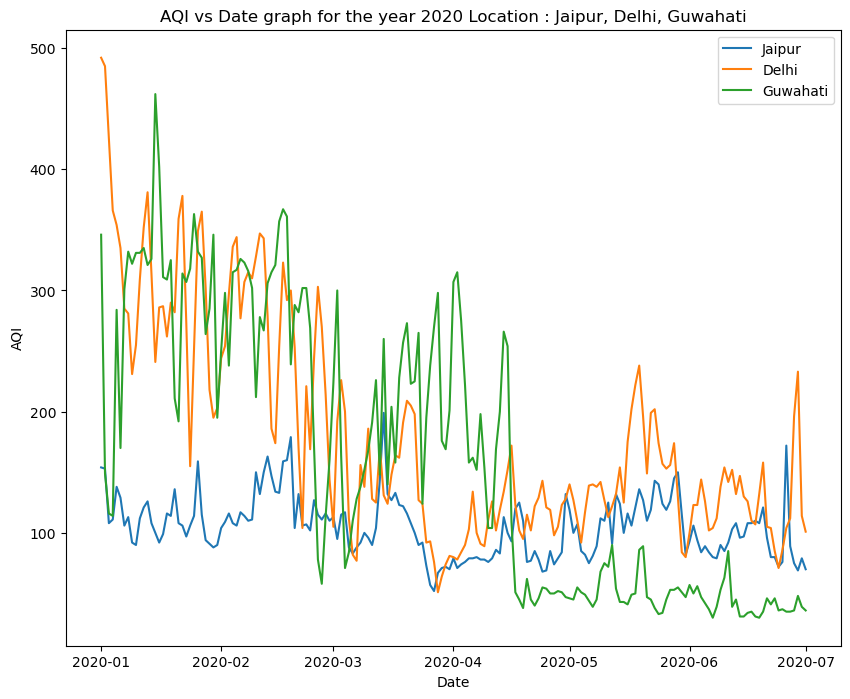

In [25]:
#Plotting the AQI vs Date graph for Jaipur, Delhi and Guwahati

plt.figure(figsize=(10,8))
plt.plot(jaipur_2020['Date'],jaipur_2020['AQI'])
plt.plot(delhi_2020['Date'],delhi_2020['AQI'])
plt.plot(guwahati_2020['Date'],guwahati_2020['AQI'])
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI vs Date graph for the year 2020 Location : Jaipur, Delhi, Guwahati")
plt.legend(["Jaipur", "Delhi","Guwahati"])

C:\Users\arund\AppData\Local\Temp\ipykernel_29124\2264051742.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jaipur_2020['NO2'] = pd.to_numeric(jaipur_2020['NO2'], errors='coerce')
C:\Users\arund\AppData\Local\Temp\ipykernel_29124\2264051742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jaipur_2020['CO'] = pd.to_numeric(jaipur_2020['CO'], errors='coerce')
C:\Users\arund\AppData\Local\Temp\ipykernel_29124\2264051742.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

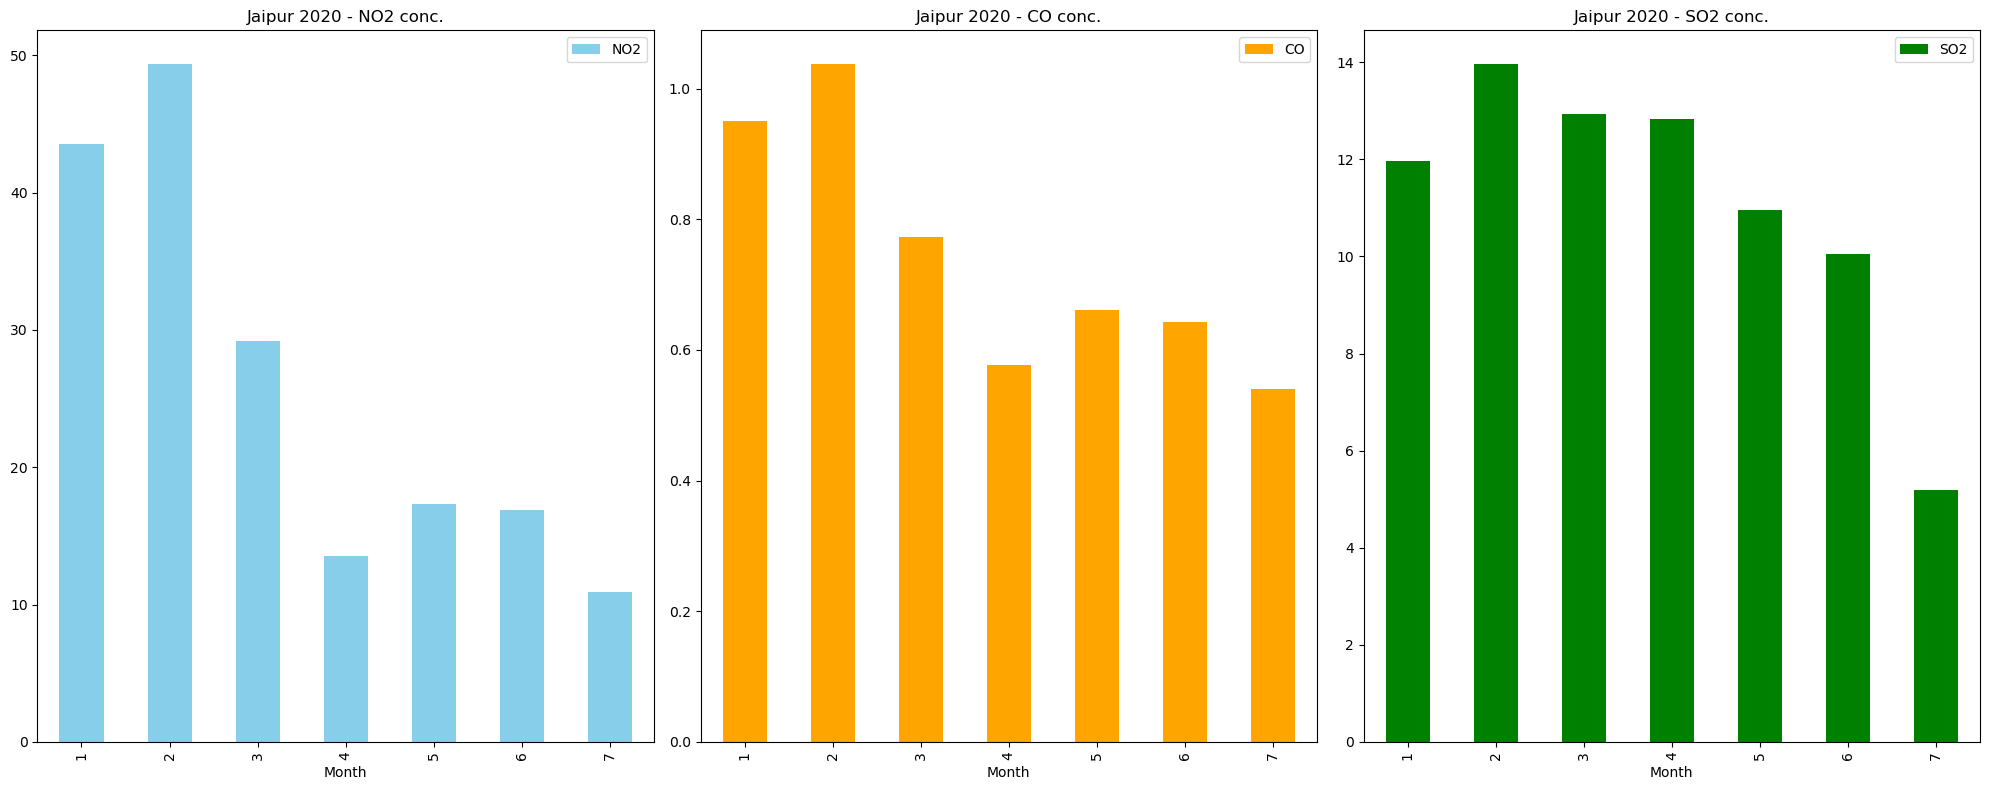

In [28]:
# Ensure 'Month' is numeric
jaipur_2020['Month'] = pd.to_numeric(jaipur_2020['Month'], errors='coerce')

# Select only the relevant columns
jaipur_2020 = jaipur_2020[['Month', 'NO2', 'CO', 'SO2']]

# Convert columns to numeric, coerce errors to NaN
jaipur_2020['NO2'] = pd.to_numeric(jaipur_2020['NO2'], errors='coerce')
jaipur_2020['CO'] = pd.to_numeric(jaipur_2020['CO'], errors='coerce')
jaipur_2020['SO2'] = pd.to_numeric(jaipur_2020['SO2'], errors='coerce')

# Drop rows where 'Month' is NaN (if any)
jaipur_2020 = jaipur_2020.dropna(subset=['Month'])

# Group by 'Month' and calculate the mean for each month
monthly_means = jaipur_2020.groupby('Month').mean()

# Plotting the data
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

# NO2 concentration
ax1.title.set_text("Jaipur 2020 - NO2 conc.")
monthly_means.plot(y='NO2', kind='bar', ax=ax1, color='skyblue')

# CO concentration
ax2.title.set_text("Jaipur 2020 - CO conc.")
monthly_means.plot(y='CO', kind='bar', ax=ax2, color='orange')

# SO2 concentration
ax3.title.set_text("Jaipur 2020 - SO2 conc.")
monthly_means.plot(y='SO2', kind='bar', ax=ax3, color='green')

plt.tight_layout()
plt.show()

C:\Users\arund\AppData\Local\Temp\ipykernel_29124\3024084910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_2020['Month'] = pd.to_numeric(delhi_2020['Month'], errors='coerce')
C:\Users\arund\AppData\Local\Temp\ipykernel_29124\3024084910.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_2020['NO2'] = pd.to_numeric(delhi_2020['NO2'], errors='coerce')
C:\Users\arund\AppData\Local\Temp\ipykernel_29124\3024084910.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

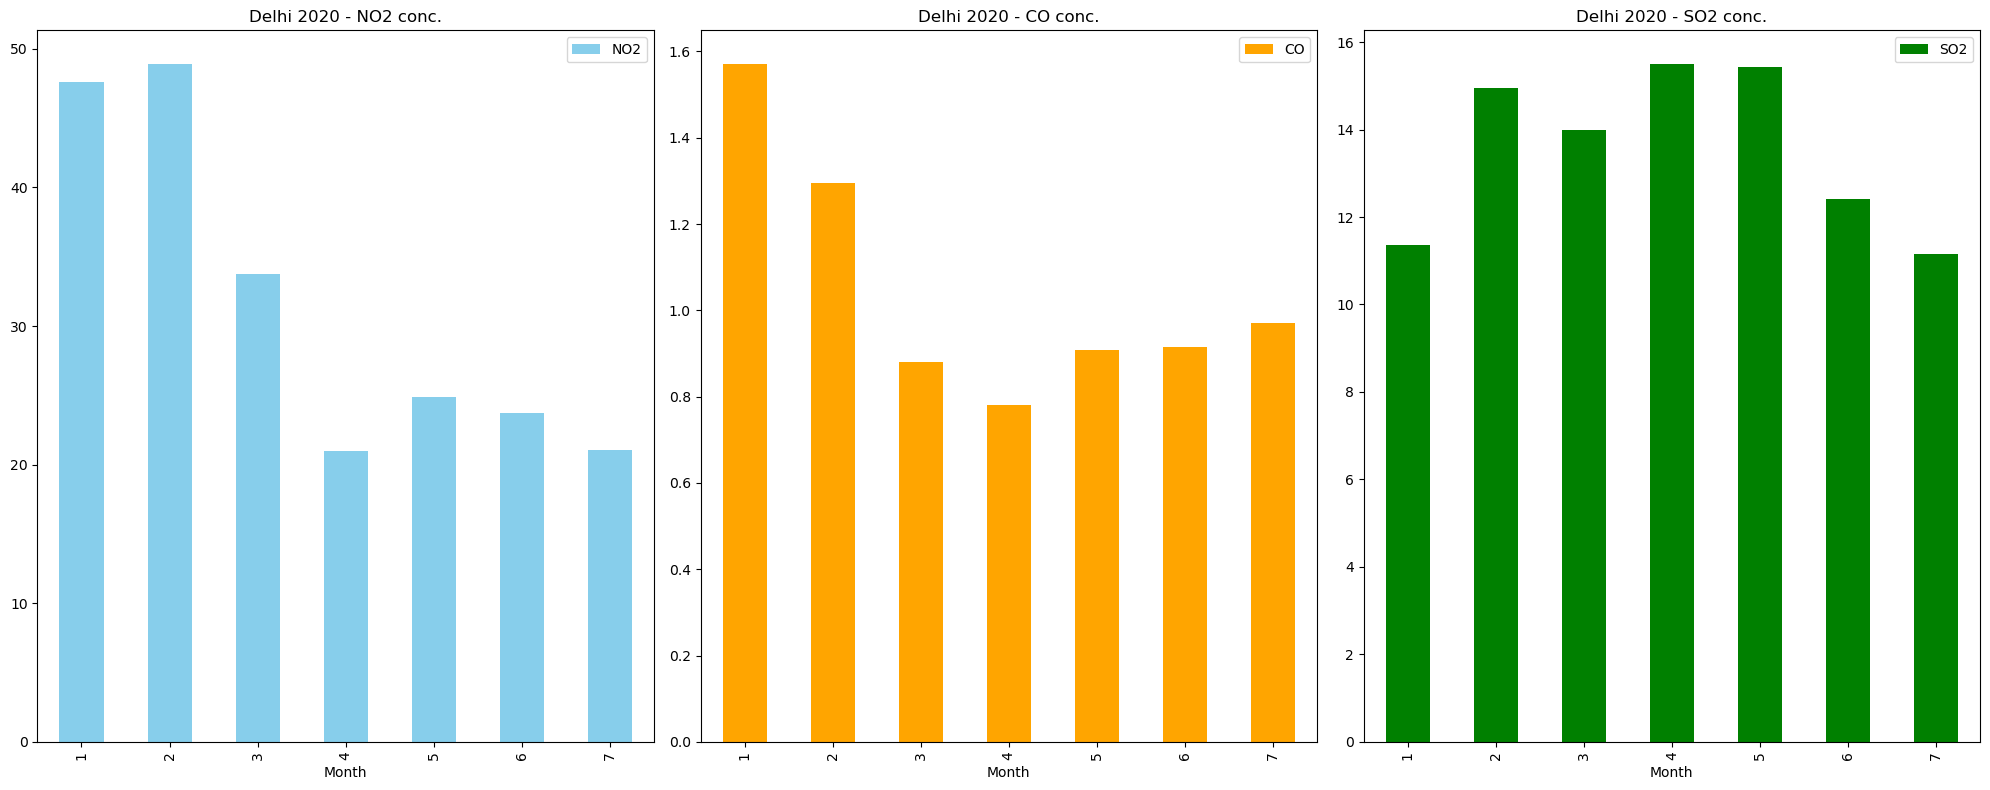

In [30]:
#Plotting the NO2, CO and SO2 concentrations in the city of Delhi

# Ensure 'Month' is numeric
delhi_2020['Month'] = pd.to_numeric(delhi_2020['Month'], errors='coerce')

# Select only the relevant columns
delhi_2020 = delhi_2020[['Month', 'NO2', 'CO', 'SO2']]

# Convert columns to numeric, coerce errors to NaN
delhi_2020['NO2'] = pd.to_numeric(delhi_2020['NO2'], errors='coerce')
delhi_2020['CO'] = pd.to_numeric(delhi_2020['CO'], errors='coerce')
delhi_2020['SO2'] = pd.to_numeric(delhi_2020['SO2'], errors='coerce')

# Drop rows where 'Month' is NaN (if any)
delhi_2020 = delhi_2020.dropna(subset=['Month'])

# Group by 'Month' and calculate the mean for each month
monthly_means = delhi_2020.groupby('Month').mean()

# Plotting the data
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

# NO2 concentration
ax1.title.set_text("Delhi 2020 - NO2 conc.")
monthly_means.plot(y='NO2', kind='bar', ax=ax1, color='skyblue')

# CO concentration
ax2.title.set_text("Delhi 2020 - CO conc.")
monthly_means.plot(y='CO', kind='bar', ax=ax2, color='orange')

# SO2 concentration
ax3.title.set_text("Delhi 2020 - SO2 conc.")
monthly_means.plot(y='SO2', kind='bar', ax=ax3, color='green')

plt.tight_layout()
plt.show()

# YEAR 2019 ANALYSIS

In [31]:
jaipur_2019 = jaipur[jaipur['Year'] == 2019]
delhi_2019 = delhi[delhi['Year'] == 2019]
guwahati_2019 = guwahati[guwahati['Year'] == 2019]

In [32]:
jaipur_2019

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
17153,Jaipur,2019-01-01,113.17,212.37,70.73,47.56,103.19,30.17,1.84,16.89,36.04,2.97,11.38,275.0,Poor,2019,1
17154,Jaipur,2019-01-02,76.03,190.06,63.37,46.22,90.90,25.62,1.66,15.89,32.90,2.53,8.67,173.0,Moderate,2019,1
17155,Jaipur,2019-01-03,98.19,167.25,26.38,45.85,56.90,24.20,1.12,19.49,30.52,1.70,7.58,232.0,Poor,2019,1
17156,Jaipur,2019-01-04,65.04,140.16,18.83,38.01,44.36,21.58,1.06,22.65,37.85,1.63,7.68,203.0,Poor,2019,1
17157,Jaipur,2019-01-05,63.41,130.37,6.08,25.45,23.06,19.01,0.80,13.07,61.45,1.31,8.01,134.0,Moderate,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17513,Jaipur,2019-12-27,55.55,151.74,41.42,77.26,96.65,52.73,1.30,13.06,29.57,6.61,23.82,145.0,Moderate,2019,12
17514,Jaipur,2019-12-28,64.59,164.04,24.38,78.18,82.95,51.35,1.18,11.23,36.27,6.80,22.56,144.0,Moderate,2019,12
17515,Jaipur,2019-12-29,71.03,156.69,13.85,70.77,70.51,49.52,1.28,11.57,29.60,7.26,24.67,146.0,Moderate,2019,12
17516,Jaipur,2019-12-30,80.04,183.66,8.70,60.65,55.85,41.64,1.24,12.76,37.50,6.99,23.31,182.0,Moderate,2019,12


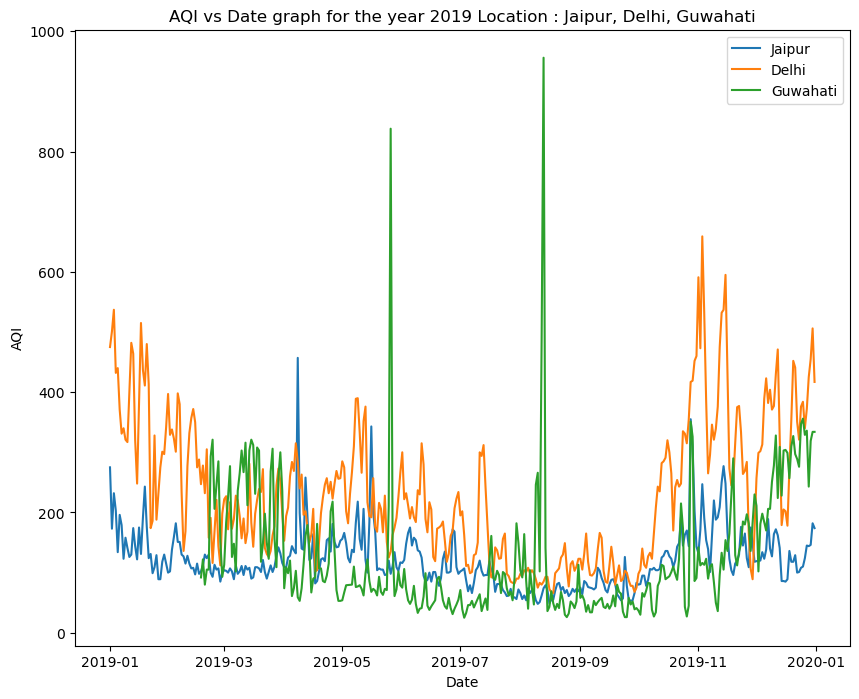

In [33]:
#Plotting the AQI vs Date graph for Jaipur, Delhi and Guwahati

plt.figure(figsize=(10,8))
plt.plot(jaipur_2019['Date'],jaipur_2019['AQI'])
plt.plot(delhi_2019['Date'],delhi_2019['AQI'])
plt.plot(guwahati_2019['Date'],guwahati_2019['AQI'])
plt.xlabel("Date")
plt.ylabel("AQI")
plt.title("AQI vs Date graph for the year 2019 Location : Jaipur, Delhi, Guwahati")
plt.legend(["Jaipur", "Delhi","Guwahati"])

C:\Users\arund\AppData\Local\Temp\ipykernel_29124\3074585631.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jaipur_2019['Month'] = pd.to_numeric(jaipur_2019['Month'], errors='coerce')
C:\Users\arund\AppData\Local\Temp\ipykernel_29124\3074585631.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jaipur_2019['NO2'] = pd.to_numeric(jaipur_2019['NO2'], errors='coerce')
C:\Users\arund\AppData\Local\Temp\ipykernel_29124\3074585631.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

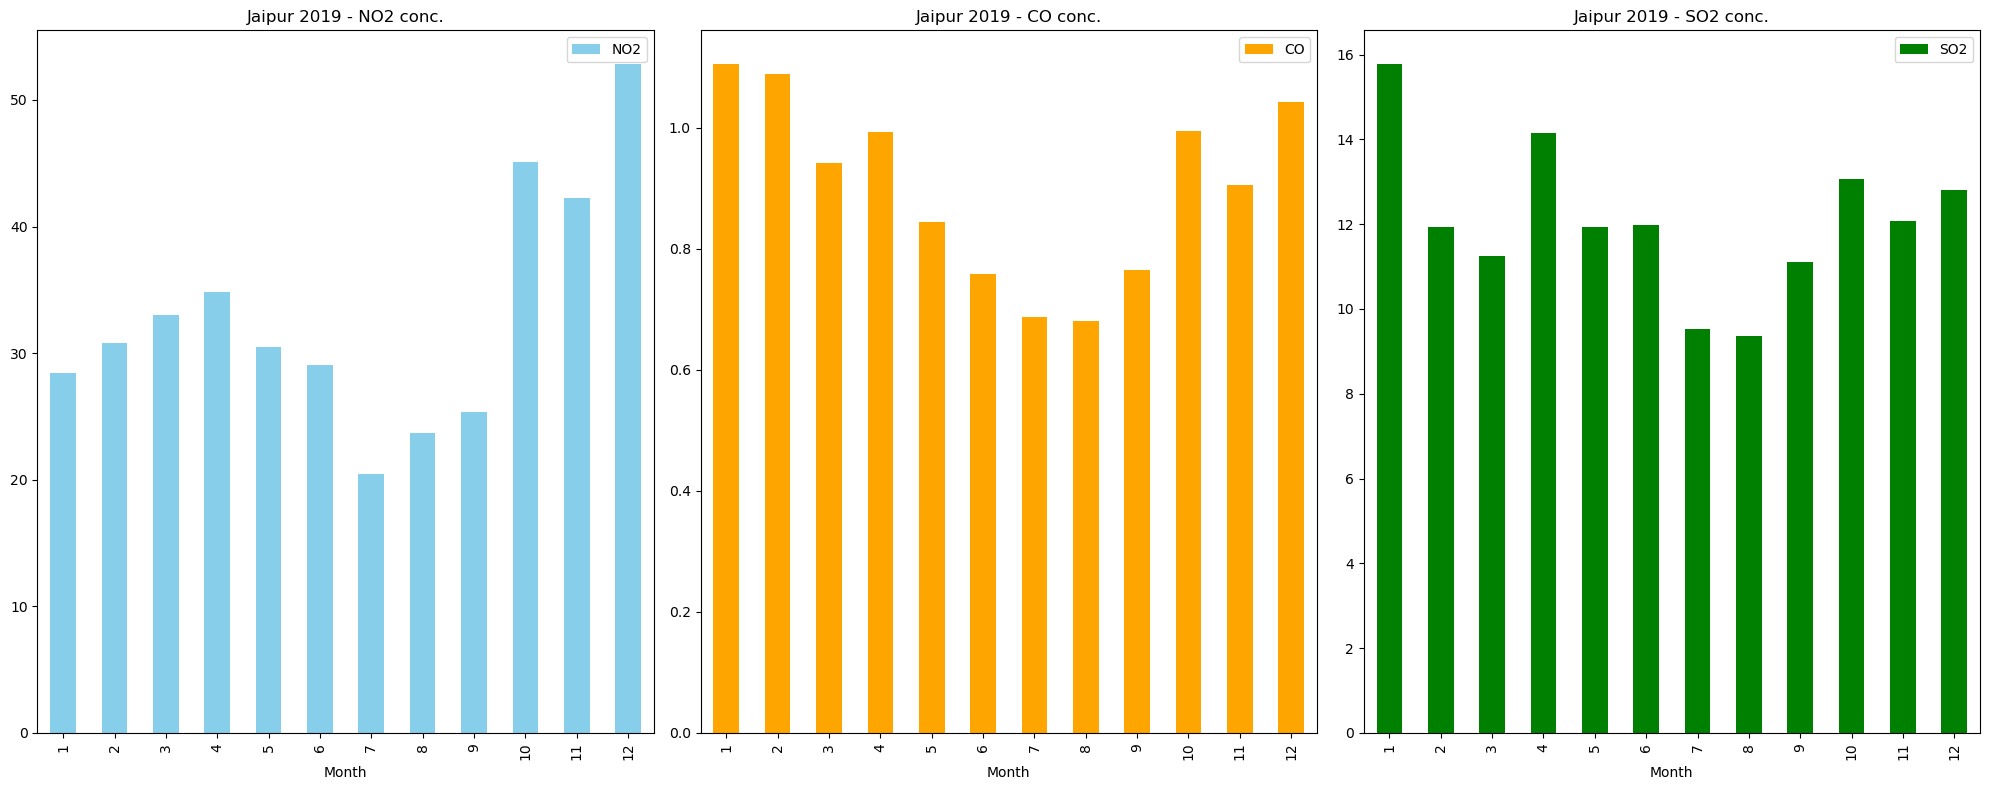

In [35]:
#Plotting the NO2, CO and SO2 concentrations in the city of Jaipur

# Ensure 'Month' is numeric
jaipur_2019['Month'] = pd.to_numeric(jaipur_2019['Month'], errors='coerce')

# Select only the relevant columns
jaipur_2019 = jaipur_2019[['Month', 'NO2', 'CO', 'SO2']]

# Convert columns to numeric, coerce errors to NaN
jaipur_2019['NO2'] = pd.to_numeric(jaipur_2019['NO2'], errors='coerce')
jaipur_2019['CO'] = pd.to_numeric(jaipur_2019['CO'], errors='coerce')
jaipur_2019['SO2'] = pd.to_numeric(jaipur_2019['SO2'], errors='coerce')

# Drop rows where 'Month' is NaN (if any)
jaipur_2019 = jaipur_2019.dropna(subset=['Month'])

# Group by 'Month' and calculate the mean for each month
monthly_means = jaipur_2019.groupby('Month').mean()

# Plotting the data
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

# NO2 concentration
ax1.title.set_text("Jaipur 2019 - NO2 conc.")
monthly_means.plot(y='NO2', kind='bar', ax=ax1, color='skyblue')

# CO concentration
ax2.title.set_text("Jaipur 2019 - CO conc.")
monthly_means.plot(y='CO', kind='bar', ax=ax2, color='orange')

# SO2 concentration
ax3.title.set_text("Jaipur 2019 - SO2 conc.")
monthly_means.plot(y='SO2', kind='bar', ax=ax3, color='green')

plt.tight_layout()
plt.show()

In [36]:
jaipur_2019.groupby(jaipur_2019['Month']).mean()

,NO2,CO,SO2
Month,,,
1,28.460000,1.105806,15.781290
2,30.768571,1.088214,11.921786
3,33.017742,0.941613,11.250323
4,34.851667,0.992667,14.157667
5,30.480323,0.845161,11.930645
6,29.043667,0.758667,11.978000
7,20.474194,0.687097,9.518387
8,23.703871,0.680645,9.358710
9,25.319667,0.765667,11.097667


In [37]:
jaipur_2020.groupby(jaipur_2020['Month']).mean()

,NO2,CO,SO2
Month,,,
1,43.505806,0.950645,11.964194
2,49.343793,1.037586,13.959310
3,29.194839,0.773548,12.932258
4,13.514333,0.576667,12.830667
5,17.301290,0.661290,10.955161
6,16.859000,0.643000,10.054333
7,10.880000,0.540000,5.190000


# YEAR 2019 VS 2020

<Axes: xlabel='Month'>

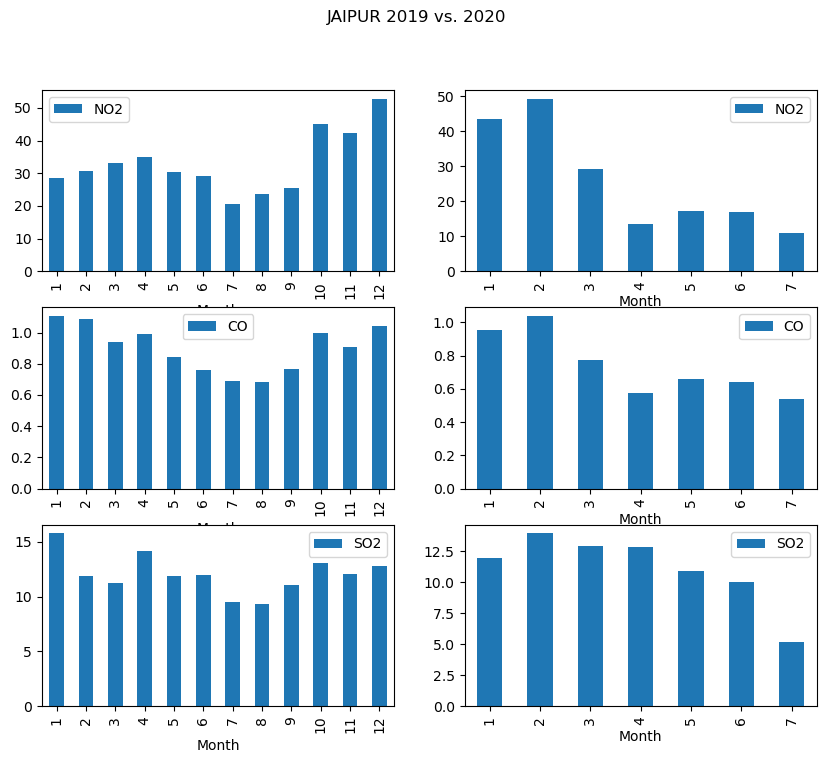

In [38]:
#Comparing the NO2,CO,SO2 concentrations for the city of Jaipur during the year 2019 and 2020 

fig,ax = plt.subplots(3,2,figsize = (10,8))
fig.suptitle("JAIPUR 2019 vs. 2020")
jaipur_2019.groupby(jaipur_2019['Month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax[0,0])
jaipur_2020.groupby(jaipur_2020['Month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax[0,1])
jaipur_2019.groupby(jaipur_2019['Month']).mean().plot(y = ['CO'],kind = 'bar',ax =ax[1,0])
jaipur_2020.groupby(jaipur_2020['Month']).mean().plot(y = ['CO'],kind = 'bar',ax =ax[1,1])
jaipur_2019.groupby(jaipur_2019['Month']).mean().plot(y = ['SO2'],kind = 'bar',ax =ax[2,0])
jaipur_2020.groupby(jaipur_2020['Month']).mean().plot(y = ['SO2'],kind = 'bar',ax =ax[2,1])

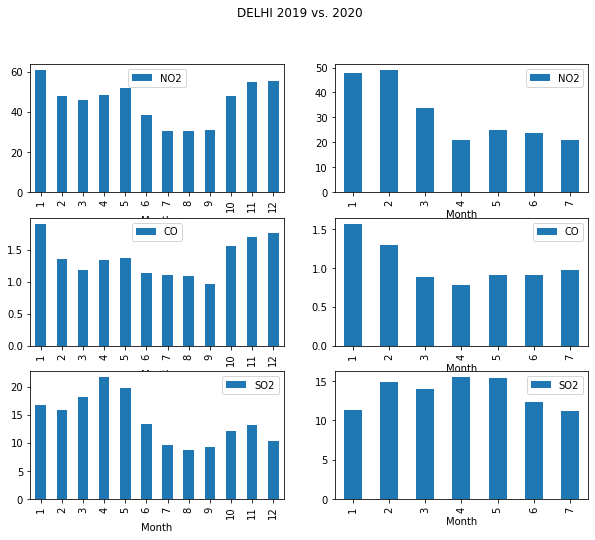

In [28]:
#Comparing the NO2,CO,SO2 concentrations for the city of Delhi during the year 2019 and 2020

fig,ax = plt.subplots(3,2,figsize = (10,8))
fig.suptitle("DELHI 2019 vs. 2020")
delhi_2019.groupby(delhi_2019['Month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax[0,0])
delhi_2020.groupby(delhi_2020['Month']).mean().plot(y = ['NO2'],kind = 'bar',ax =ax[0,1])
delhi_2019.groupby(delhi_2019['Month']).mean().plot(y = ['CO'],kind = 'bar',ax =ax[1,0])
delhi_2020.groupby(delhi_2020['Month']).mean().plot(y = ['CO'],kind = 'bar',ax =ax[1,1])
delhi_2019.groupby(delhi_2019['Month']).mean().plot(y = ['SO2'],kind = 'bar',ax =ax[2,0])
delhi_2020.groupby(delhi_2020['Month']).mean().plot(y = ['SO2'],kind = 'bar',ax =ax[2,1])

# Jaipur 2015-2020

In [39]:
jaipur_2018 = jaipur[jaipur['Year'] == 2018]
jaipur_2017 = jaipur[jaipur['Year'] == 2017]
jaipur_2016 = jaipur[jaipur['Year'] == 2016]
jaipur_2015 = jaipur[jaipur['Year'] == 2015]

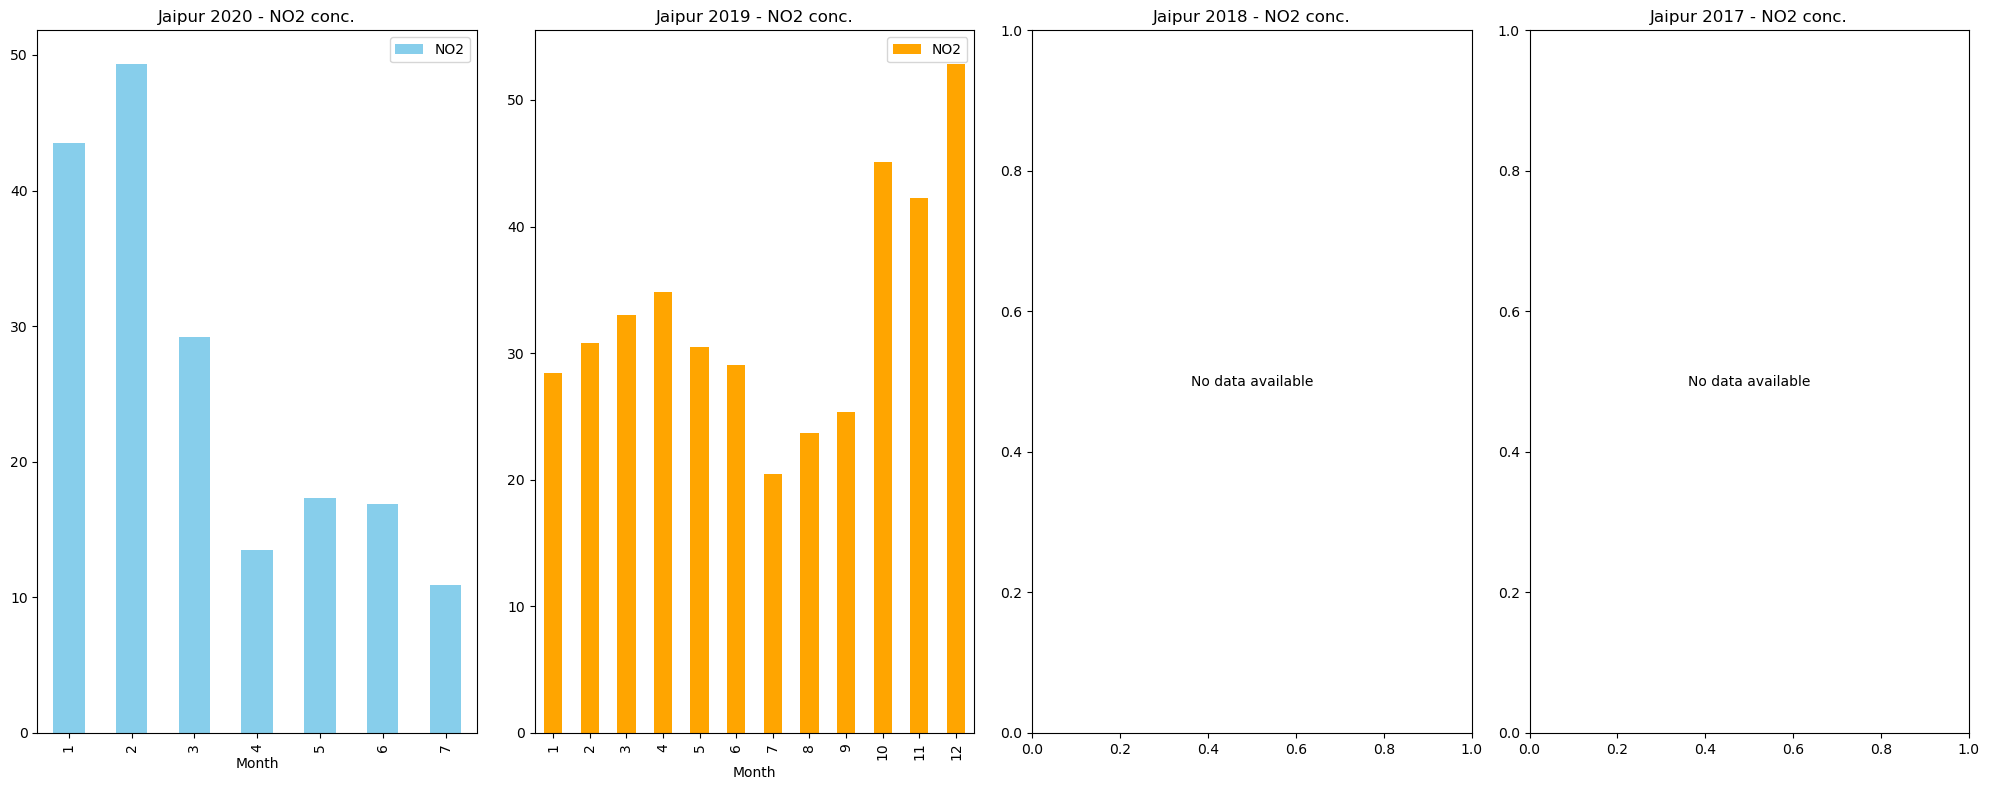

In [45]:
#plotting the NO2 concentration for the city of Jaipur during the year 2017-20
#(2015,2016) data is not available for Jaipur


# Function to preprocess the data
def preprocess_data(df):
    # Ensure all columns that will be used in calculations are numeric
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    df = df.dropna(subset=['Month', 'NO2'])
    return df

# Preprocess the data for each year
jaipur_2020 = preprocess_data(jaipur_2020)
jaipur_2019 = preprocess_data(jaipur_2019)
jaipur_2018 = preprocess_data(jaipur_2018)
jaipur_2017 = preprocess_data(jaipur_2017)

# Group by 'Month' and calculate the mean for each month
monthly_means_2020 = jaipur_2020.groupby('Month').mean()
monthly_means_2019 = jaipur_2019.groupby('Month').mean()
monthly_means_2018 = jaipur_2018.groupby('Month').mean()
monthly_means_2017 = jaipur_2017.groupby('Month').mean()

# Plotting the data
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

# NO2 concentration for 2020
ax1.title.set_text("Jaipur 2020 - NO2 conc.")
if not monthly_means_2020.empty:
    monthly_means_2020.plot(y='NO2', kind='bar', ax=ax1, color='skyblue')
else:
    ax1.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes)

# NO2 concentration for 2019
ax2.title.set_text("Jaipur 2019 - NO2 conc.")
if not monthly_means_2019.empty:
    monthly_means_2019.plot(y='NO2', kind='bar', ax=ax2, color='orange')
else:
    ax2.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)

# NO2 concentration for 2018
ax3.title.set_text("Jaipur 2018 - NO2 conc.")
if not monthly_means_2018.empty:
    monthly_means_2018.plot(y='NO2', kind='bar', ax=ax3, color='green')
else:
    ax3.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes)

# NO2 concentration for 2017
ax4.title.set_text("Jaipur 2017 - NO2 conc.")
if not monthly_means_2017.empty:
    monthly_means_2017.plot(y='NO2', kind='bar', ax=ax4, color='purple')
else:
    ax4.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes)

plt.tight_layout()
plt.show()

In [46]:
delhi_2018 = delhi[delhi['Year'] == 2018]
delhi_2017 = delhi[delhi['Year'] == 2017]
delhi_2016 = delhi[delhi['Year'] == 2016]
delhi_2015 = delhi[delhi['Year'] == 2015]

C:\Users\arund\AppData\Local\Temp\ipykernel_29124\1223053369.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\arund\AppData\Local\Temp\ipykernel_29124\1223053369.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Date'].dt.month
C:\Users\arund\AppData\Local\Temp\ipykernel_29124\1223053369.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

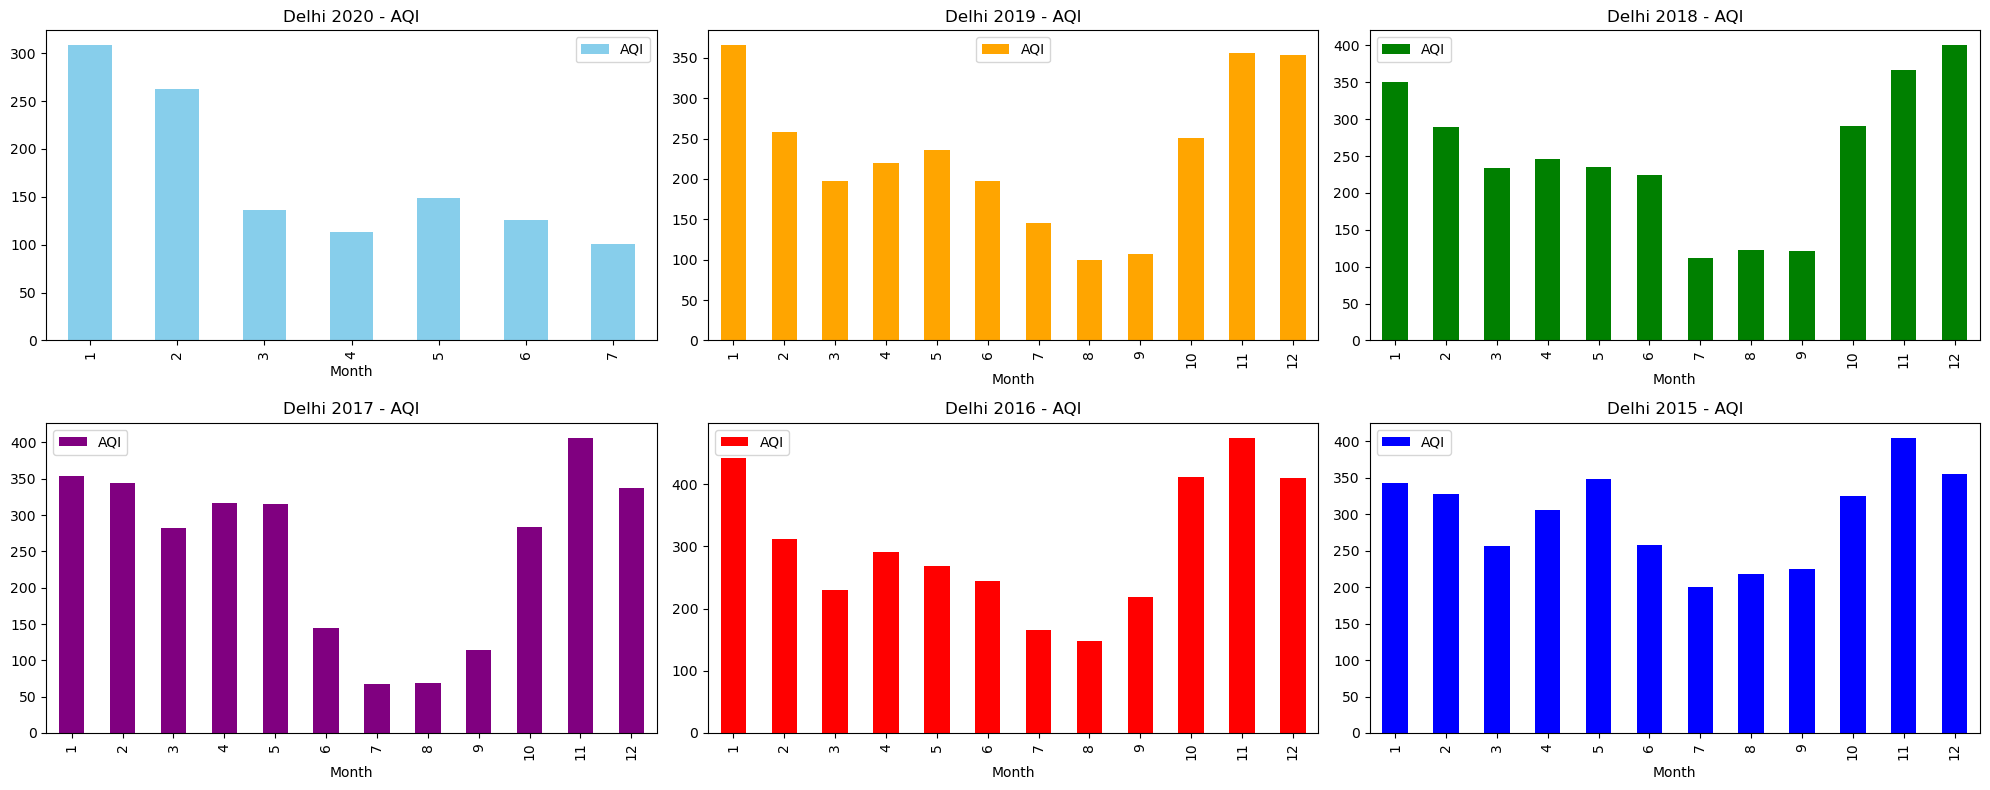

In [50]:
#plotting the NO2 concentration for the city of Delhi during the year 2015-2020

# Filter the data for Delhi
delhi_data = df[df['City'] == 'Delhi']

# Function to preprocess the data
def preprocess_data(df):
    # Convert 'Date' column to datetime and extract month
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Month'] = df['Date'].dt.month
    # Ensure all columns that will be used in calculations are numeric
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    df = df.dropna(subset=['Month', 'AQI'])
    return df

# Filter and preprocess the data for each year
delhi_2020 = preprocess_data(delhi_data[delhi_data['Date'].dt.year == 2020])
delhi_2019 = preprocess_data(delhi_data[delhi_data['Date'].dt.year == 2019])
delhi_2018 = preprocess_data(delhi_data[delhi_data['Date'].dt.year == 2018])
delhi_2017 = preprocess_data(delhi_data[delhi_data['Date'].dt.year == 2017])
delhi_2016 = preprocess_data(delhi_data[delhi_data['Date'].dt.year == 2016])
delhi_2015 = preprocess_data(delhi_data[delhi_data['Date'].dt.year == 2015])

# Group by 'Month' and calculate the mean for each month
monthly_means_2020 = delhi_2020.groupby('Month').mean() if not delhi_2020.empty else pd.DataFrame()
monthly_means_2019 = delhi_2019.groupby('Month').mean() if not delhi_2019.empty else pd.DataFrame()
monthly_means_2018 = delhi_2018.groupby('Month').mean() if not delhi_2018.empty else pd.DataFrame()
monthly_means_2017 = delhi_2017.groupby('Month').mean() if not delhi_2017.empty else pd.DataFrame()
monthly_means_2016 = delhi_2016.groupby('Month').mean() if not delhi_2016.empty else pd.DataFrame()
monthly_means_2015 = delhi_2015.groupby('Month').mean() if not delhi_2015.empty else pd.DataFrame()

# Plotting the data
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 8))

# Helper function to plot if data is available
def plot_if_available(ax, data, title, color):
    if not data.empty:
        data.plot(y='AQI', kind='bar', ax=ax, color=color)
    else:
        ax.text(0.5, 0.5, 'No data available', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.title.set_text(title)

# Plot for each year
plot_if_available(ax1, monthly_means_2020, "Delhi 2020 - AQI", 'skyblue')
plot_if_available(ax2, monthly_means_2019, "Delhi 2019 - AQI", 'orange')
plot_if_available(ax3, monthly_means_2018, "Delhi 2018 - AQI", 'green')
plot_if_available(ax4, monthly_means_2017, "Delhi 2017 - AQI", 'purple')
plot_if_available(ax5, monthly_means_2016, "Delhi 2016 - AQI", 'red')
plot_if_available(ax6, monthly_means_2015, "Delhi 2015 - AQI", 'blue')

plt.tight_layout()
plt.show()

In [51]:
delhi.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 10229 to 12237
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        1999 non-null   object        
 1   Date        1999 non-null   datetime64[ns]
 2   PM2.5       1998 non-null   float64       
 3   PM10        1930 non-null   float64       
 4   NO          1998 non-null   float64       
 5   NO2         1998 non-null   float64       
 6   NOx         1999 non-null   float64       
 7   NH3         1991 non-null   float64       
 8   CO          1999 non-null   float64       
 9   SO2         1897 non-null   float64       
 10  O3          1923 non-null   float64       
 11  Benzene     1999 non-null   float64       
 12  Toluene     1999 non-null   float64       
 13  AQI         1999 non-null   float64       
 14  AQI_Bucket  1999 non-null   object        
 15  Year        1999 non-null   int64         
 16  Month       1999 non-nul

In [52]:
#Function to check the amount of missing values

def missing_values_table(df):
    table = pd.DataFrame(df.isnull().sum(), columns = ['count'])
    table['percentage'] = round((table['count']/df.shape[0])*100,2)
    return table

In [53]:
missing_values_table(delhi)

,count,percentage
City,0,0.00
Date,0,0.00
PM2.5,1,0.05
PM10,69,3.45
NO,1,0.05
NO2,1,0.05
NOx,0,0.00
NH3,8,0.40
CO,0,0.00
SO2,102,5.10
